### STEPS TODO:
0. For PAD and YF: choose inner ROI
1. Seed with CIR maks lakes (to help YF)
1. (1.5 Filter out edge lakes and small lakes
2. "Spatial bootstrapping"
3. Histograms of EM% and EM% binned by AREA
4. Choose best dates (in notebook) or multi-temporal hist

### TODO: 
* Add 'all' plot

Makes plots like this:
![this](/mnt/d/pic/UAVSAR_classification/Hists-time-PAD.jpg)

Makes plots like this: <img src="/mnt/d/pic/UAVSAR_classification/Hists-time-PAD.jpg" width=400 height=400 />

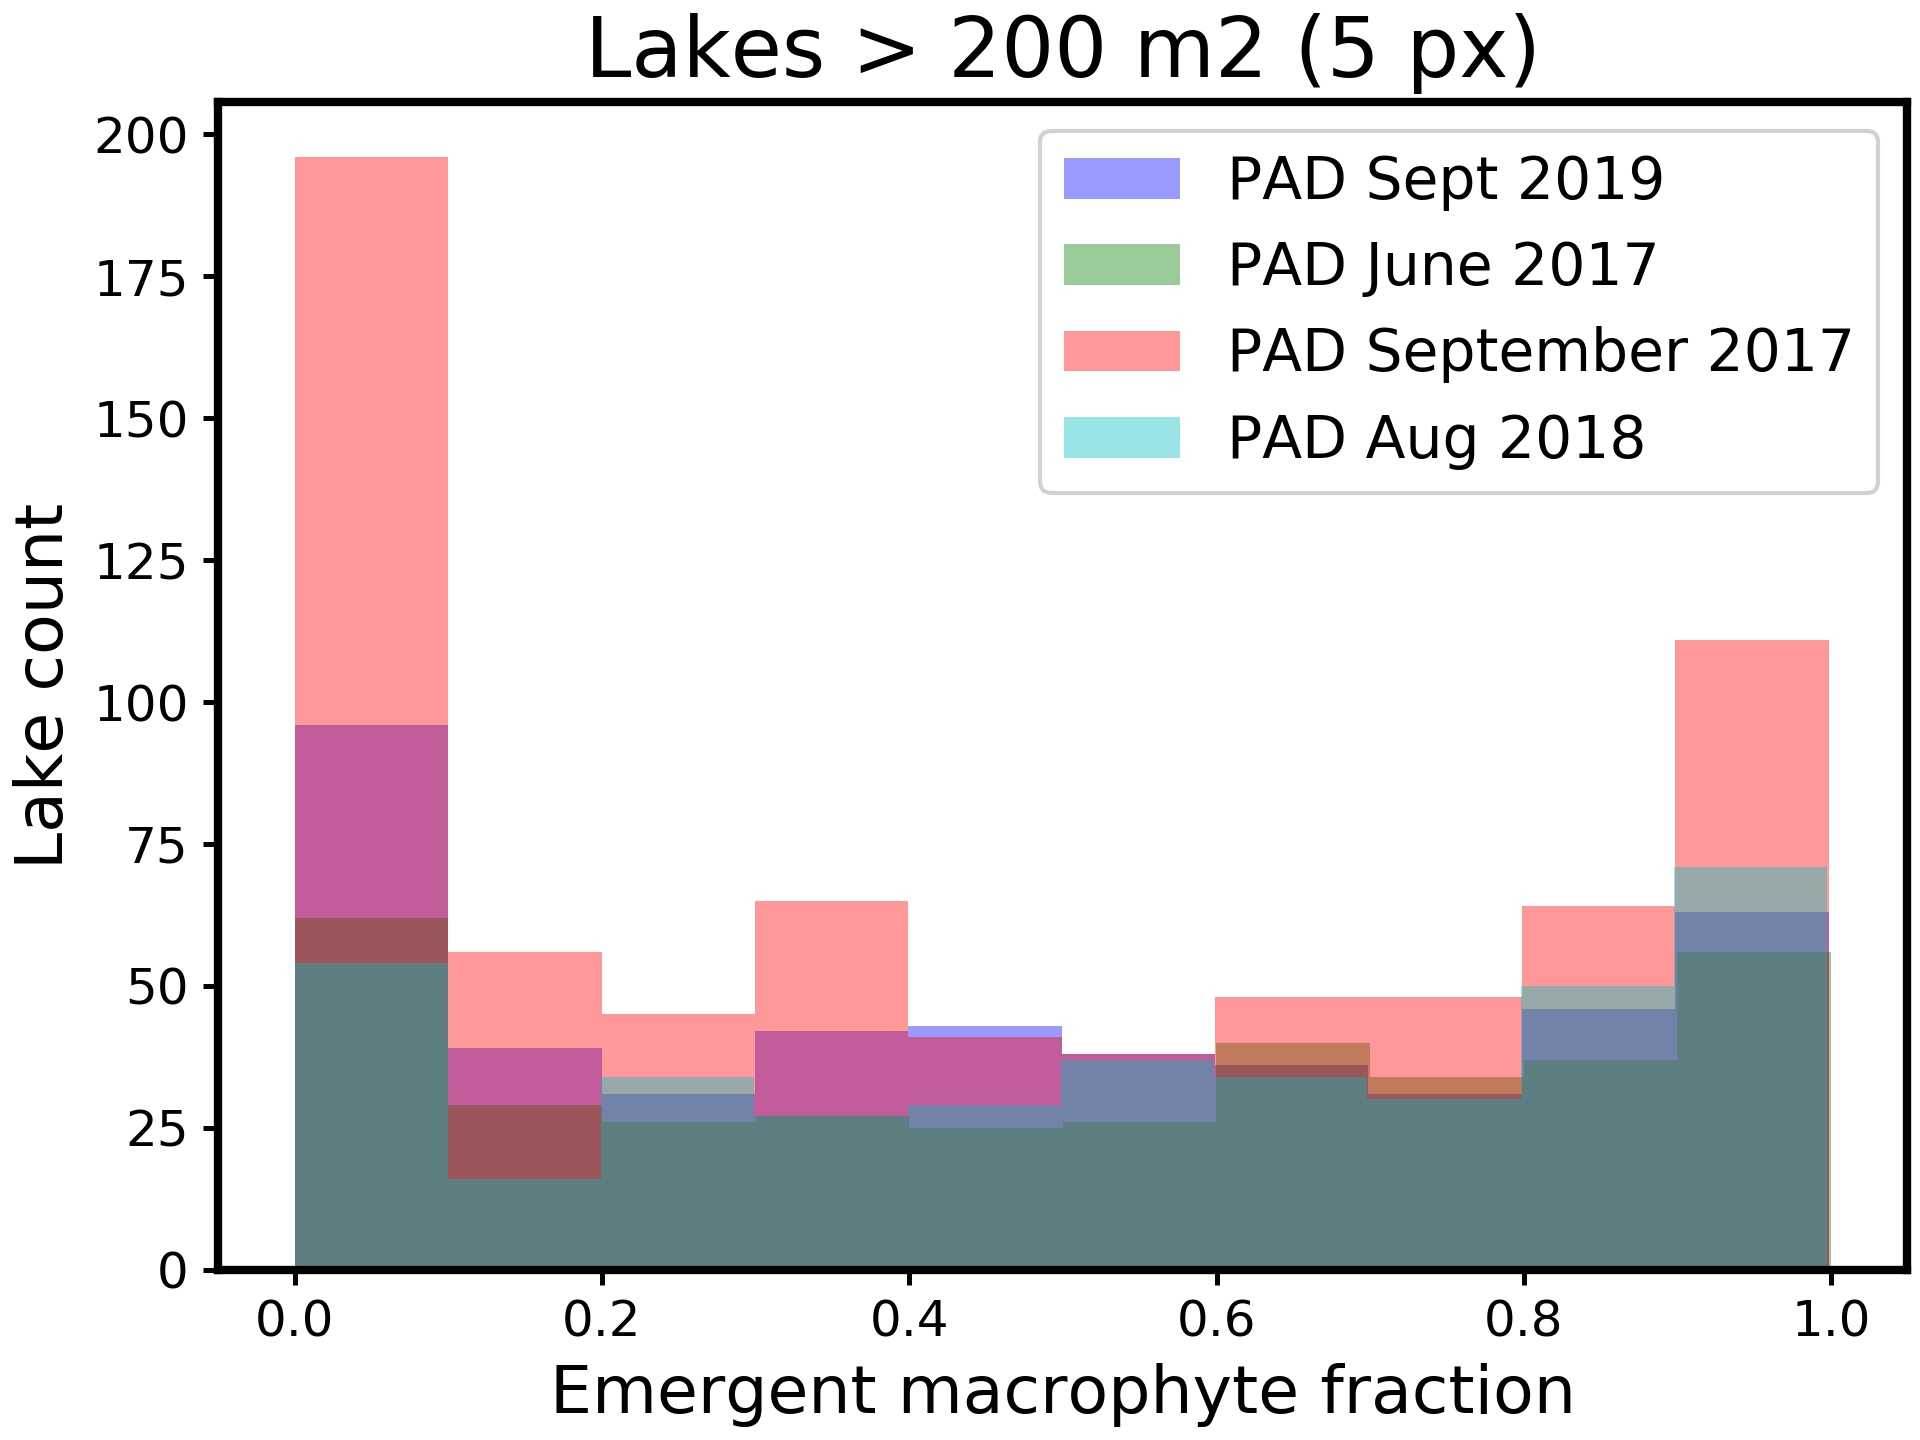

In [1]:
## imports
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from python_env import *

In [2]:
## User vars
min_size= 250 #50000 # meters squared
# regions=['Daring','Baker','PAD','YFLATS'] # See env.py

## constants
colors=['b','g','r', 'c'] # for date order
colors=['#264653','#2a9d8f','#e9c46a','#f4a261'] # https://coolors.co/264653-2a9d8f-e9c46a-f4a261-e76f51
colors_lookup={'early 2017':'#606c38', 'late 2017':'#ffe8d6', 'late 2018':'#ddbea9', 'late 2019':'#cb997e'} #v1
colors_lookup={'early 2017':'#B7B7A4', 'late 2017':'#FFD1AD', 'late 2018':'#D0A68A', 'late 2019':'#B97550'} #v2

labels=dict(zip(
    [
    'daring_21405_17063_010_170614_L090_CX_01_LUT-Freeman_rcls_lakes.shp',
    'daring_21405_17094_010_170909_L090_CX_01_LUT-Freeman_rcls_lakes.shp',
    'bakerc_16008_18047_005_180821_L090_CX_02_Freeman-inc_rcls_lakes.shp',
    'bakerc_16008_19059_012_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp',
    'PAD_170613_mosaic_rcls_lakes.shp',
    'PAD_170908_mosaic_rcls_lakes.shp',
    'PAD_180821_mosaic_rcls_lakes.shp',
    'padelE_36000_19059_003_190904_L090_CX_01_Freeman-inc_rcls_lakes.shp',
    'YFLATS_170621_mosaic_rcls_lakes.shp',
    'YFLATS_170916_mosaic_rcls_lakes.shp',
    'YFLATS_180827_mosaic_rcls_lakes.shp',
    'YFLATS_190914_mosaic_rcls_lakes.shp'
    ],

    [
    ['Daring June 2017', 'early 2017'],
    ['Daring Sept 2017', 'late 2017'],
    ['Baker Aug 2018', 'late 2018'],
    ['Baker Sept 2019', 'late 2019'],
    ['PAD June 2017', 'early 2017'],
    ['PAD September 2017', 'late 2017'],
    ['PAD Aug 2018', 'late 2018'],
    ['PAD Sept 2019', 'late 2019'],
    ['YFLATS June 2017', 'early 2017'],
    ['YFLATS Sept 2017', 'late 2017'],
    ['YFLATS Aug 2018', 'late 2018'],
    ['YFLATS Sept 2019', 'late 2019']
    ]
))

In [3]:
## load data
####################################################
## Branch for entire directory #####################
files_in=glob.glob(os.path.join(shape_dir, '*.shp'))
# files_in=glob.glob(os.path.join(shape_dir, 'bakerc*.shp'))

####################################################
## Branch for testing ##############################
# files_in=['/mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers/DCS-seed/PAD_170908_mosaic_rcls_lakes.shp']
####################################################

## Plotting params
# plt.rcParams
# plt.style.use('seaborn')
plt.style.use('/mnt/d/Dropbox/Python/Matplotlib-rcParams/presentation.mplstyle')

In [4]:
## loop to load data
lakes_list=[]
lakes_labels=[]
lakes_seasons=[]
for region in regions:
    print('\n\n----------------\nRegion: '+region)
    lakes_list_within_region=[]
    lakes_labels_within_region=[]
    lakes_seasons_within_region=[]
    for i, filename in enumerate(files_in):
#         print(f'Input: {filename}')
        ## dynamic I/O
        label = labels[os.path.basename(filename)][0]

        ## validate region
        if label.split(' ')[0] != region:
            continue

        print('label: '+label)

        ## print
        print(f'\t(File {i+1} of {len(files_in)})\n')

        ## I/O
        lakes = gpd.read_file(filename)

        ## filter
        filter=(lakes.edge==False) & (lakes.area_px_m2>=min_size/px_area) & (lakes.cir_observ==True)

        ## plot
        # plt.hist(lakes[filter].em_fractio)#, bins=40)
        # plt.title(f'EM fraction for lakes > {min_size} m2 ({min_size/px_area:.0f} px)')
        # plt.ylabel('Lake count')
        # plt.xlabel('Emergent macrophyte fraction')
        # plt.show()

        ## save data to memory
        lakes_list_within_region.append(lakes[filter])
        lakes_labels_within_region.append(label)
        lakes_seasons_within_region.append(labels[os.path.basename(filename)][1])
    lakes_list.append(lakes_list_within_region)
    lakes_labels.append(lakes_labels_within_region)
    lakes_seasons.append(lakes_seasons_within_region)



----------------
Region: YFLATS
label: YFLATS June 2017
	(File 9 of 12)

label: YFLATS Sept 2017
	(File 10 of 12)

label: YFLATS Aug 2018
	(File 11 of 12)

label: YFLATS Sept 2019
	(File 12 of 12)



----------------
Region: PAD
label: PAD Sept 2019
	(File 5 of 12)

label: PAD June 2017
	(File 6 of 12)

label: PAD September 2017
	(File 7 of 12)

label: PAD Aug 2018
	(File 8 of 12)



----------------
Region: Daring
label: Daring June 2017
	(File 3 of 12)

label: Daring Sept 2017
	(File 4 of 12)



----------------
Region: Baker
label: Baker Aug 2018
	(File 1 of 12)

label: Baker Sept 2019
	(File 2 of 12)



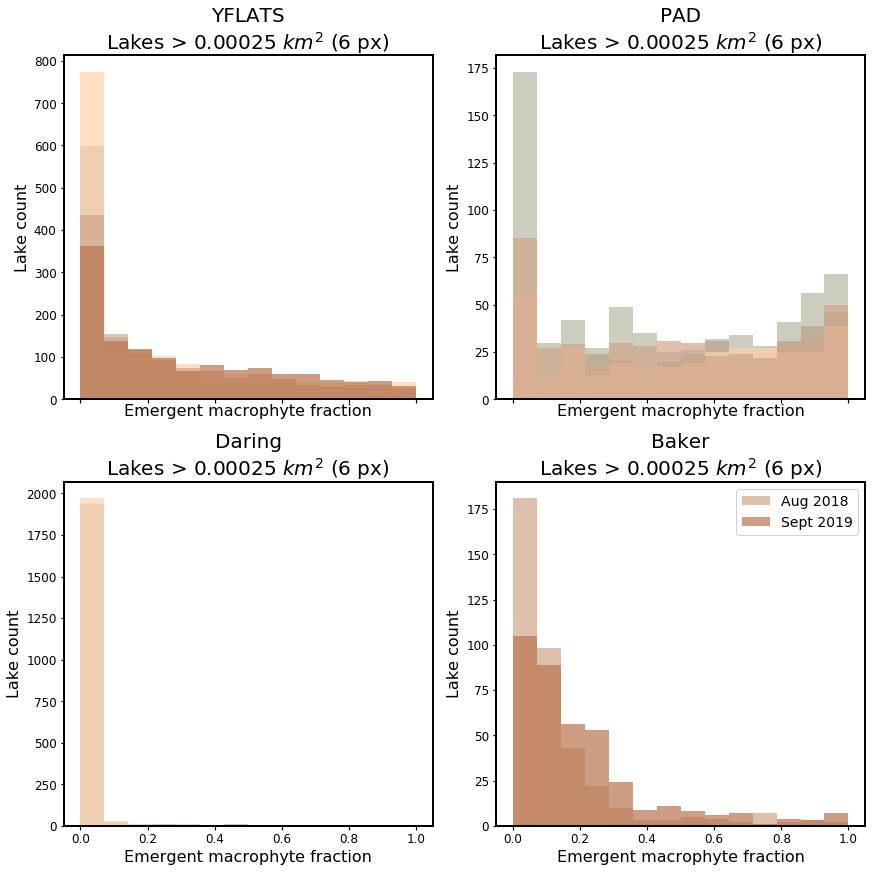

In [5]:
%matplotlib inline
## loop for plotting
fig, ax = plt.subplots(2,2, sharex=True, figsize=(12,12), constrained_layout=True) # constrained_layout is now default for presentation
for j, region in enumerate(regions):
    axi = np.take(ax, j)
    for i, lakes in enumerate(lakes_list[j][::-1]):  # reverse order
        label=lakes_labels[j][i].split(' ')[1]+' '+lakes_labels[j][i].split(' ')[2]
        axi.hist(lakes.em_fractio, bins=np.linspace(0,1,15), alpha=0.7, color=colors_lookup[lakes_seasons[j][i]], label=label) # bins=20, 
    # ax.legend()
    # fig.show()
    axi.set_ylabel('Lake count')
    axi.set_xlabel('Emergent macrophyte fraction')
    axi.set_title(f'{region}\nLakes > {min_size/1e6} $km^2$ ({min_size/px_area:.0f} px)')
#     axi.legend() # sets legend on all
ax[1,1].legend()
## save fig
figname=os.path.join(fig_dir, 'Hists-time-4-panel')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)

# Merge lakes from each UAVSAR scene, with basic QC filtering

In [152]:
## loop to load data for combined plot (not efficient, bc loading data for second time...)

for i, filename in enumerate(files_in):
#         print(f'Input: {filename}')
    ## dynamic I/O
#     label = labels[os.path.basename(filename)][0]

    ## print
    print(f'\t(File {i+1} of {len(files_in)})\n')

    ## I/O
    lakes = gpd.read_file(filename)

    ## filter
    filter=(lakes.edge==False) & (lakes.area_px_m2>=min_size/px_area) & (lakes.cir_observ==True)

    ## save data to memory
    lakes['season_year'] = labels[os.path.basename(filename)][1]
    lakes['season'] = labels[os.path.basename(filename)][1].split(' ')[0]
    lakes['count']=len(lakes)
    lakes['region_season']=labels[os.path.basename(filename)][0]
    lakes['region'] = labels[os.path.basename(filename)][0].split(' ')[0]
    lakes['year'] = labels[os.path.basename(filename)][0].split(' ')[2]
    
    ## append
    if i == 0:
        lakes_combined = lakes
    else:
        lakes_combined = lakes_combined.append(lakes, ignore_index = True)
        
## Save file
excel_pth = os.path.join(shape_dir, 'combined_excel', 'lakes_filtered_combined.xlsx')
lakes_combined.to_excel(excel_pth)
print(f'Saved as excel: {excel_pth}')

	(File 1 of 12)

	(File 2 of 12)

	(File 3 of 12)

	(File 4 of 12)

	(File 5 of 12)

	(File 6 of 12)

	(File 7 of 12)

	(File 8 of 12)

	(File 9 of 12)

	(File 10 of 12)

	(File 11 of 12)

	(File 12 of 12)

Saved as excel: /mnt/f/PAD2019/classification_training/PixelClassifier/Final-ORNL-DAAC/shp_no_rivers_subroi/combined_excel/lakes_filtered_combined.xlsx


...If I want to continue with seasonal averages, I will need to bin each UAVSAR scene by EM%, then average across years for each site in each season. Possibly throw out Baker data bc only late summer acquisitions.

In [145]:
## take means of each season
lakes_combined_by_season = lakes_combined.groupby('season')
lakes_combined_by_season.mean()

,label,area_px_m2,perimeter_,em_fractio,fw_fractio,sw_fractio,gw_fractio,edge,cir_observ,count
season,,,,,,,,,,
early,18058.417437,42702.573727,599.849976,0.129642,0.000519,0.015841,0.113282,0.018686,0.113036,14845.710258
late,19124.186830,42980.183544,653.852305,0.163190,0.000552,0.026805,0.135834,0.022202,0.132559,11123.186573


# Scratch

In [ ]:
%matplotlib inline
## loop for plotting: combined plot
fig, axi = plt.subplots(figsize=(6,6), constrained_layout=True) # constrained_layout is now default for presentation
for j, region in enumerate(regions):
    for i, lakes in enumerate(lakes_list[j]):
        label=lakes_labels[j][i].split(' ')[1]+' '+lakes_labels[j][i].split(' ')[2]
        axi.hist(lakes.em_fractio, bins=np.linspace(0,1,15), alpha=0.4, color=colors_lookup[lakes_seasons[j][i]], label=label) # bins=20, 
    # ax.legend()
    # fig.show()
    axi.set_ylabel('Lake count')
    axi.set_xlabel('Emergent macrophyte fraction')
    axi.set_title(f'{region}\nLakes > {min_size/1e6} $km^2$ ({min_size/px_area:.0f} px)')
#     axi.legend() # sets legend on all
ax[1,1].legend()
## save fig
figname=os.path.join(fig_dir, 'Hists-time-4-panel')
fig.savefig(figname + '.jpg', dpi=300)
fig.savefig(figname + '.pdf', dpi=300)